## Creating validation set

Each folder in train set contains 100 images of that particular sport.
Moving 10 images randomly from each sports folder to create validation set.

ps:- initially the train folder contains all the sports dataset i.e. 100 images per sports

In [1]:
import os
import numpy as np

In [2]:
os.getcwd()

'/home/sidd/fastai/courses/dl1'

In [3]:
# changing dir to the dataset

os.chdir('../../../data/sports/')
os.getcwd()

'/home/sidd/data/sports'

#### To be done once

In [4]:
# # removing .DS_Store from all the sports folder

# from_dir = './train/'
# to_dir = './valid/'

# for sport in os.listdir(from_dir):
#     sport_dir = from_dir+sport
#     print(sport_dir)
    
#     os.remove(sport_dir+'/.DS_Store')

./train/Swimming
./train/Basketball
./train/Soccer
./train/Baseball
./train/Athletics
./train/Tennis
./train/Golf
./train/Cricket
./train/Volleyball
./train/Gymnastics


In [5]:
# from_dir = './train/'
# to_dir = './valid/'

# for sport in os.listdir(from_dir):
#     sport_dir = from_dir+sport
#     print(sport_dir)
    
#     # converting to numpy array for indexing
#     all_img_list = np.array(os.listdir(sport_dir))
#     print(len(all_img_list))
    
#     # out of 100 elements pick 10 at random
#     val_idx = np.random.choice(30,10,replace = False)
#     val_img_name = all_img_list[val_idx] 
#     print((val_img_name))
    
    
#     # creating the folder if doesn't exist
#     os.makedirs(to_dir+sport,exist_ok=True)
    
#     # moving from train to valid folder
#     [os.rename(sport_dir+'/'+val_img,to_dir+sport+'/'+val_img) for val_img in val_img_name]

./train/Swimming
100
['83c01094422340bc.jpg' '55bb79298f66586a.jpg' '623bf9be48c095b1.jpg'
 '70ba57b2c7303e25.jpg' '995f0179618884dd.jpg' '4d1d55553d07a704.jpg'
 '1204e923383e80a4.jpg' '68ac3084861126ef.jpg' '500a895ca96547af.jpg'
 '354edcb7ccae3218.jpg']
./train/Basketball
100
['9830a078708e463f.jpg' '02b70f1ae6e087e0.jpg' '4cc6a46c42f49384.jpg'
 '064d6da7d8e26d49.jpg' '226f14b9752bc0fb.jpg' '091eff71db84c658.jpg'
 '7a6d7d99a586f749.jpg' '5e40d0bce6bbdb45.jpg' '1e8e97ae16cca52e.jpg'
 '41b7e41746ade6eb.jpg']
./train/Soccer
100
['01dab5e76a87e998.jpg' '77dc3eb5b8766651.jpg' '03c689cb7bba1af9.jpg'
 '15cc4b7066271dcb.jpg' '01c8b035eac85396.jpg' '16bae36c50e70876.jpg'
 '032bac5e2d8d7323.jpg' '01f9745db02d0ceb.jpg' '02ca45acb8095e3e.jpg'
 '2e8bd117813b83b8.jpg']
./train/Baseball
100
['53f1a2c9bfd9888e.jpg' '9ecbc556e93ece73.jpg' '72a1bb08b598bc59.jpg'
 '9d2a4bed2c1a32e0.jpg' '2b46cddb8500eea8.jpg' '2d6e6f380902e65c.jpg'
 '5f9893a291d89dbe.jpg' '700daa66f3a6cf15.jpg' '47cb31b10e3858c0.jpg'
 

In [6]:
# chaning dir back to the Sports_classifier.ipynb location
os.chdir('/home/sidd/fastai/courses/dl1')
os.getcwd()

'/home/sidd/fastai/courses/dl1'

# Creating Sports Classifier

In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [9]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from fastai.imports import *

In [10]:
PATH = "../../../data/sports/"
sz=224

In [11]:
torch.cuda.is_available()

True

In [12]:
torch.backends.cudnn.enabled

True

## Looking at dataset

In [15]:
os.listdir(PATH)

['valid', 'train']

In [16]:
os.listdir(f'{PATH}valid')

['Swimming',
 'Basketball',
 'Soccer',
 'Baseball',
 'Athletics',
 'Tennis',
 'Golf',
 'Cricket',
 'Volleyball',
 'Gymnastics']

In [17]:
files = os.listdir(f'{PATH}valid/Swimming')[:5]
files

['83c01094422340bc.jpg',
 '354edcb7ccae3218.jpg',
 '500a895ca96547af.jpg',
 '623bf9be48c095b1.jpg',
 '68ac3084861126ef.jpg']

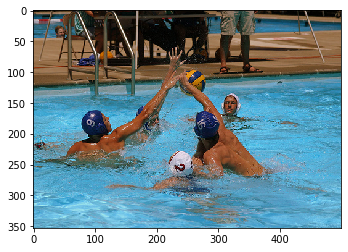

In [18]:
img = plt.imread(f'{PATH}valid/Swimming/{files[0]}')
plt.imshow(img);

In [19]:
img.shape

(353, 500, 3)

## creating CNN model

In [20]:
arch = resnet34
data = ImageClassifierData.from_paths(PATH,bs=10,tfms = tfms_from_model(arch,sz))
learn = ConvLearner.pretrained(arch,data,precompute=True)

100%|██████████| 10/10 [00:01<00:00,  9.24it/s]


In [21]:
learn.lr_find()

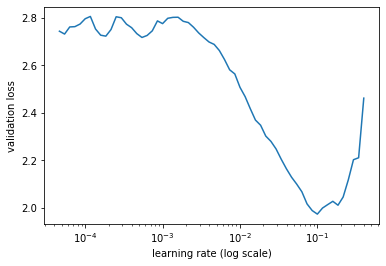

In [22]:
learn.sched.plot()

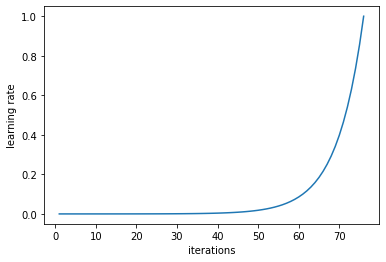

In [23]:
learn.sched.plot_lr()

In [25]:
learn.fit(0.03,2)


epoch      trn_loss   val_loss   accuracy                 
    0      1.6495335169113832 [0.95053]  0.7999999955296516
    1      1.1496509226332974 [0.67097]  0.8499999940395355


[array([0.67097]), 0.8499999940395355]

## Analyzing results: looking at pictures

In [26]:
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [27]:
data.classes

['Athletics',
 'Baseball',
 'Basketball',
 'Cricket',
 'Golf',
 'Gymnastics',
 'Soccer',
 'Swimming',
 'Tennis',
 'Volleyball']

In [28]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(100, 10)

In [29]:
log_preds[:10]

array([[ -3.40324,  -4.94262,  -2.09092,  -8.31955,  -4.30229,  -6.95274,  -7.9305 ,  -9.25794,  -0.19773,
         -8.32133],
       [ -0.55856,  -9.68551,  -1.18869,  -8.91742, -10.72354, -13.11542,  -2.18432, -12.46832,  -4.61794,
         -7.26726],
       [ -7.26146, -10.60944, -19.39174, -13.4337 ,  -0.00074, -14.48796, -19.40037, -12.1673 , -19.23313,
        -13.68381],
       [ -5.43313, -16.00088,  -4.40735,  -0.20624, -10.78342, -10.80952,  -1.7786 ,  -8.75141, -10.78012,
         -7.25172],
       [ -0.01454, -20.09841, -19.21671, -19.40462, -17.75005, -14.27904, -18.39243, -12.42298,  -4.24159,
         -9.99875],
       [ -0.08992, -12.19274, -13.86908,  -9.819  ,  -5.08988,  -2.64524, -10.10359,  -4.87996, -11.08106,
         -6.78167],
       [ -0.00412, -14.89511,  -5.5599 ,  -9.27692,  -9.68087, -18.09169,  -9.47363, -16.3608 , -10.45809,
        -14.59019],
       [ -0.64243,  -7.6286 ,  -4.14593, -10.92904, -11.03649, -12.77425,  -0.78266, -14.48195,  -7.82572,
    

In [33]:
preds = np.argmax(log_preds, axis=1)  # predicted values (which sport)
probs = np.exp(log_preds)        # from log probabilities to 0 or 1

In [35]:
probs[:10]

array([[0.03327, 0.00714, 0.12357, 0.00024, 0.01354, 0.00096, 0.00036, 0.0001 , 0.82059, 0.00024],
       [0.57203, 0.00006, 0.30462, 0.00013, 0.00002, 0.     , 0.11255, 0.     , 0.00987, 0.0007 ],
       [0.0007 , 0.00002, 0.     , 0.     , 0.99927, 0.     , 0.     , 0.00001, 0.     , 0.     ],
       [0.00437, 0.     , 0.01219, 0.81364, 0.00002, 0.00002, 0.16888, 0.00016, 0.00002, 0.00071],
       [0.98557, 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.01438, 0.00005],
       [0.914  , 0.00001, 0.     , 0.00005, 0.00616, 0.07099, 0.00004, 0.0076 , 0.00002, 0.00113],
       [0.99589, 0.     , 0.00385, 0.00009, 0.00006, 0.     , 0.00008, 0.     , 0.00003, 0.     ],
       [0.52601, 0.00049, 0.01583, 0.00002, 0.00002, 0.     , 0.45719, 0.     , 0.0004 , 0.00005],
       [0.00025, 0.03897, 0.     , 0.00001, 0.00001, 0.     , 0.00104, 0.     , 0.17007, 0.78965],
       [0.78945, 0.     , 0.20411, 0.00023, 0.00001, 0.00131, 0.00485, 0.00002, 0.00001, 0.     ]],
      dty

In [38]:
preds[:100]

array([8, 0, 4, 3, 0, 0, 0, 0, 9, 0, 1, 6, 1, 3, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 6, 3, 6, 3, 6, 6, 6, 6,
       6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 2, 9, 9, 9, 2, 9, 9, 9, 2])